In [66]:
import os
import sys
import pygsheets
import math
import numpy as np
import pandas as pd
import ams_utilities as au
from openpyxl import load_workbook
from itertools import cycle
import scipy
import pyabf
import paq2py
import scipy.stats as ss 
from itertools import product
from morph_analysis_jake import *
import matplotlib.pyplot as plt
from statistics import mean


In [48]:
directory = r"\\163.1.248.177\Root\jswann\Morphologies"
#list datapath sheets
datapaths = []
for root, subdirs, files in os.walk(directory):
    for filename in files:
        if filename.endswith(".xlsx"):
            temppath=os.path.join(root, filename)
            datapaths.append(temppath)

datapaths.remove(r'\\163.1.248.177\Root\jswann\Morphologies\2020-04-02_AS041_Slice01_Cell01\2020-04-02_AS041_Slice01_Cell01_data.xlsx')
print(len(datapaths))

61


In [55]:
def extract_wedge(data,sheetnames):
    if 'Wedge - Dendrites' in sheetnames:
        dfWedge = pd.read_excel(data, 'Wedge - Dendrites')
        wedgeData=dfWedge.iloc[0:36,3]
        return wedgeData
    else:
        print(i)

In [56]:
#start angles
startAngles=np.arange(0,360,10)
endAngles=np.arange(10,370,10)

#mouseID list
mouseIDs=[]
for i in datapaths:
    mouseIDs.append(get_mouseID(i))

In [63]:
#create wedge analysis dataframe
for i in datapaths:
    data=e2p(i)
    sheetnames=get_sheet_names(data)
    wedgeData=extract_wedge(data,sheetnames)
    single_cell_wedge=pd.DataFrame(data=wedgeData)
    
    if i == datapaths[0]:
        df_all = single_cell_wedge
    else:
        df_all = pd.concat([df_all, single_cell_wedge], axis=1, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)

df_all.columns=mouseIDs
df_all.index=startAngles
#Sort columns into order
df_all=df_all.reindex(sorted(df_all.columns),axis=1)
df_all

,AS016: Cell01,AS016: Cell02,AS029: Cell01,AS030: Cell01,AS035: Cell01,AS036: Cell01,AS038: Cell01,AS039: Cell01,AS039: Cell02,AS040: Cell01,...,AS115: Cell01,AS116: Cell01,AS116: Cell02,AS117: Cell04,AS132: Cell03,AS143: Cell03,AS152: Cell01,AS237: Cell01,AS237: Cell02,AS237: Cell04
0,17.18,55.83,20.44,10.87,6.56,4.27,36.66,67.43,51.31,13.13,...,-1.00,-1.00,6.19,-1.00,2.51,-1.00,57.17,12.84,10.85,28.69
10,111.79,20.19,23.66,11.05,8.33,0.42,20.86,26.52,53.14,23.51,...,-1.00,-1.00,6.39,-1.00,19.35,-1.00,115.56,14.48,33.87,103.36
20,22.98,5.41,128.31,11.74,9.15,-1.00,15.95,33.47,14.85,6.04,...,-1.00,-1.00,23.62,-1.00,4.65,-1.00,23.54,13.43,32.17,90.23
30,51.61,5.14,17.14,13.02,8.79,-1.00,12.57,28.32,17.92,6.50,...,69.16,-1.00,94.66,-1.00,-1.00,-1.00,7.43,48.99,12.76,44.72
40,148.02,9.05,13.61,24.38,0.82,1.95,15.71,29.40,20.32,12.99,...,25.34,3.79,63.58,-1.00,-1.00,-1.00,-1.00,146.29,13.81,331.93
50,122.55,12.60,1.93,22.53,-1.00,4.25,36.90,20.31,21.03,18.07,...,55.40,52.85,111.52,-1.00,2.67,-1.00,-1.00,114.88,21.95,128.34
60,17.49,13.82,2.45,55.91,-1.00,4.41,102.09,22.27,11.64,11.60,...,93.55,32.86,41.71,-1.00,4.41,-1.00,-1.00,65.08,7.77,227.37
70,67.45,14.56,11.48,21.68,-1.00,4.96,86.92,34.94,13.69,21.47,...,108.37,141.89,45.97,46.58,-1.00,-1.00,-1.00,8.64,-1.00,60.91
80,92.97,19.04,38.86,0.85,-1.00,3.90,87.09,69.23,44.88,28.39,...,42.47,95.89,19.33,17.57,-1.00,-1.00,-1.00,33.21,-1.00,89.60
90,44.39,43.48,46.90,9.74,-1.00,4.05,69.40,104.92,52.77,22.48,...,-1.00,84.53,11.43,8.09,-1.00,-1.00,-1.00,59.29,-1.00,67.29


In [64]:
#Normalise by longest bin
longest=df_all.max(0)
datastd=df_all.div(longest, axis=1)
datastd

,AS016: Cell01,AS016: Cell02,AS029: Cell01,AS030: Cell01,AS035: Cell01,AS036: Cell01,AS038: Cell01,AS039: Cell01,AS039: Cell02,AS040: Cell01,...,AS115: Cell01,AS116: Cell01,AS116: Cell02,AS117: Cell04,AS132: Cell03,AS143: Cell03,AS152: Cell01,AS237: Cell01,AS237: Cell02,AS237: Cell04
0,0.027388,0.423918,0.117817,0.104319,0.090670,0.006425,0.236531,0.110255,0.587273,0.059447,...,-0.003857,-0.003959,0.031029,-0.002850,0.129716,-0.010341,0.353709,0.087771,0.053750,0.086434
10,0.178214,0.153303,0.136377,0.106046,0.115135,0.000632,0.134589,0.043363,0.608218,0.106443,...,-0.003857,-0.003959,0.032032,-0.002850,1.000000,-0.010341,0.714966,0.098981,0.167790,0.311391
20,0.036634,0.041078,0.739582,0.112668,0.126469,-0.001505,0.102910,0.054727,0.169967,0.027346,...,-0.003857,-0.003959,0.118402,-0.002850,0.240310,-0.010341,0.145641,0.091804,0.159368,0.271834
30,0.082276,0.039028,0.098795,0.124952,0.121493,-0.001505,0.081102,0.046306,0.205105,0.029429,...,0.266770,-0.003959,0.474510,-0.002850,-0.051680,-0.010341,0.045969,0.334883,0.063212,0.134727
40,0.235971,0.068717,0.078448,0.233973,0.011334,0.002934,0.101361,0.048072,0.232574,0.058813,...,0.097743,0.015005,0.318713,-0.002850,-0.051680,-0.010341,-0.006187,1.000000,0.068414,1.000000
50,0.195367,0.095672,0.011125,0.216219,-0.013822,0.006395,0.238080,0.033209,0.240700,0.081813,...,0.213693,0.209232,0.559026,-0.002850,0.137984,-0.010341,-0.006187,0.785289,0.108739,0.386648
60,0.027882,0.104935,0.014122,0.536564,-0.013822,0.006636,0.658688,0.036414,0.133227,0.052520,...,0.360849,0.130092,0.209083,-0.002850,0.227907,-0.010341,-0.006187,0.444870,0.038492,0.684994
70,0.107528,0.110554,0.066171,0.208061,-0.013822,0.007463,0.560810,0.057131,0.156690,0.097207,...,0.418014,0.561740,0.230438,0.132744,-0.051680,-0.010341,-0.006187,0.059061,-0.004954,0.183503
80,0.148211,0.144571,0.223990,0.008157,-0.013822,0.005868,0.561907,0.113199,0.513677,0.128537,...,0.163819,0.379627,0.096897,0.050071,-0.051680,-0.010341,-0.006187,0.227015,-0.004954,0.269936
90,0.070766,0.330144,0.270333,0.093474,-0.013822,0.006094,0.447771,0.171556,0.603983,0.101779,...,-0.003857,0.334653,0.057296,0.023055,-0.051680,-0.010341,-0.006187,0.405291,-0.004954,0.202723


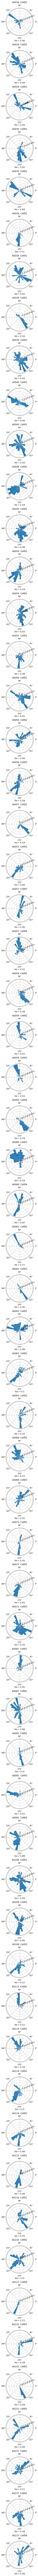

In [73]:
means = datastd.mean(0)
means.to_frame()

std= datastd.std(0)
std.to_frame()

perams=pd.concat([means,std],axis=1)
perams.columns=['Dendrite_wedge_length_mean', 'Dendrite_wedge_length_std']
perams=perams.T

#plot polar histograms
def plot_hist(lengths,location,title,std, avrg):
    bins=np.radians(np.linspace(5,355,36))
    ax = plt.subplot(61,1,location, polar=True)
    ax.bar(bins,lengths, width=2*np.pi/36)
    ax.set_title(title, pad=20)
    ax.set_xlabel('Std = ' + str(np.around(std,3)))
    return


fig, axes=plt.subplots(61,1, figsize=(5,200))

for i in range(0,len(datastd.columns)):
    avg= [mean(datastd.T.values[i])]*len(datastd.T.values[i])
    plot_hist(datastd.T.values[i], i+1, datastd.columns[i], perams.iat[1,i], avg)

plt.tight_layout()
plt.show()
fig.savefig('E:\\Jake\\normalised_wedge_histograms.png')